In [ ]:
"""
Projekt - algorytmy klasyfikacji
Laboratorium 9
"""

In [ ]:
"""Problem 1
Proszę o pobranie danych ze źródła:
https://www.kaggle.com/datasets/asmaabdolahpoor/wine-fraud/

Zbiór danych dotyczy analizy chemicznej różnych próbek wina białego i czerwonego. Analiza dotyczy 12 właściwości. Przy eksporcie drogich win o wysokiej jakości, detekcja nadużyć związanych z próbą rozprowadzania tanich win o niskiej jakości jako win o wyższej jakości ma ogromne znaczenie. Celem jest wykorzystanie zbioru danych do opracowania modelu uczenia maszynowego, a dokładnie klasyfikatora maszyny wektorów nośnych, który będzie próbował przewidzieć, czy dane wino jest prawdziwe czy fałszywe na podstawie szeregu właściwości chemicznych, czyli czy będzie wykrywał wino o niskiej jakości.

Działania:

1. Wczytanie danych, sprawdzenie danych, podstawowe statystyki.
2. Utworzenie wykresu słupkowego ilości wystąpień kategorii dotyczącej atrybutu warunkowego. Czy zbiór danych jest zbalansowany czy niezbalansowany?
3. Czy istnieje różnica między winem czerwonym i białym, jeżeli chodzi o przypadki fałszerstwa?
4. Jaki procent win czerwonych jest fałszywych, a jaki procent win białych jest fałszywych?
5. Jaka jest korelacja między różnymi cechami chemicznymi wina, a jakością wina? Utwórz wykres słupkowy wartości korelacji z winem niskiej jakości (fałszywym).
6. Zamiana kolumny kategorialnej dotyczącej rodzaju wina na zmienną fikcyjną. 
7. Podział danych na cechy (wartości numeryczne) oraz etykiety.
8. Podział zbioru danych na treningowy i testowy, gdzie zbiór testowy stanowi 10% całego zbioru danych, random_state = 101.
9. Standaryzacja zbioru treningowego i testowego.
10. Zastosowanie klasyfikatora maszyny wektorów nośnych z ustawieniami domyślnymi.
11. Wyświetl raport z klasyfikacji oraz macierz błędów dla modelu. Czy model działa dobrze? Odpowiedź uzasadnij.
12. Zastosować metodę przesukiwania siatki w celu doboru optymalnych parametrów C oraz gamma.
13. Wyświetl raport z klasyfikacji oraz macierz błędów dla modelu. Czy model działa dobrze? Czy jakość klasyfikacji uległa zmianie w porównaniu do modelu wygenerowango z ustawieniami domyślnymi? Odpowiedź uzasadnij.
"""

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [44]:
# 1. Wczytanie danych, sprawdzenie danych, podstawowe statystyki.
data = pd.read_csv("./wine_fraud.csv")

In [45]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [47]:
data.shape

(6497, 13)

In [46]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [48]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  type                  6497 non-null   object 
dtypes: float64(11), object(2)
memory usage: 660.0+ KB


In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


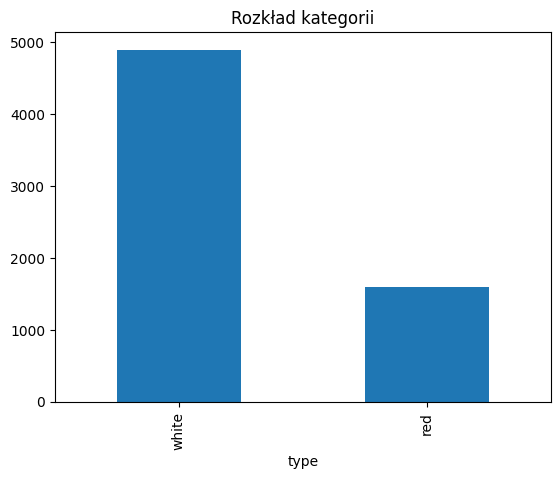

In [7]:
# 2. Utworzenie wykresu słupkowego ilości wystąpień kategorii dotyczącej atrybutu warunkowego.
import matplotlib.pyplot as plt

data['type'].value_counts().plot(kind='bar')
plt.title('Rozkład kategorii')
plt.show()

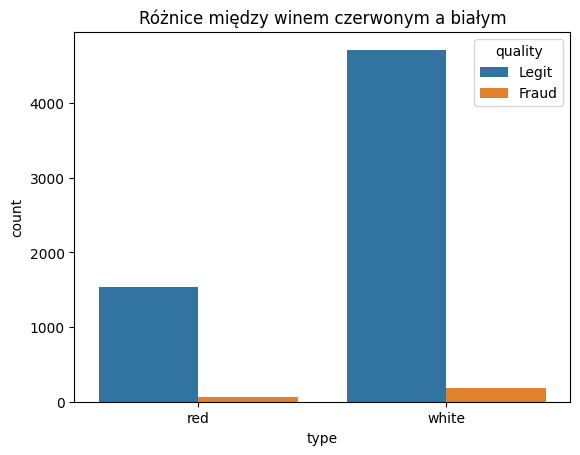

In [13]:
# 3. Różnice między winem czerwonym i białym w przypadkach fałszerstwa.
sns.countplot(x='type', hue='quality', data=data)
plt.title('Różnice między winem czerwonym a białym')
plt.show()

In [23]:
# 4. Procent fałszywych win czerwonych i białych.
false_red = data[(data['quality'] == 'Fraud') & (data['type'] == 'red')]
false_white = data[(data['quality'] == 'Fraud') & (data['type'] == 'white')]

percentage_false_red = len(false_red) / len(data[data['type'] == 'red']) * 100
percentage_false_white = len(false_white) / len(data[data['type'] == 'white']) * 100

print(f'Procent fałszywych czerwonych win: {percentage_false_red}%')
print(f'Procent fałszywych białych win: {percentage_false_white}%')

Procent fałszywych czerwonych win: 3.9399624765478425%
Procent fałszywych białych win: 3.7362188648427925%


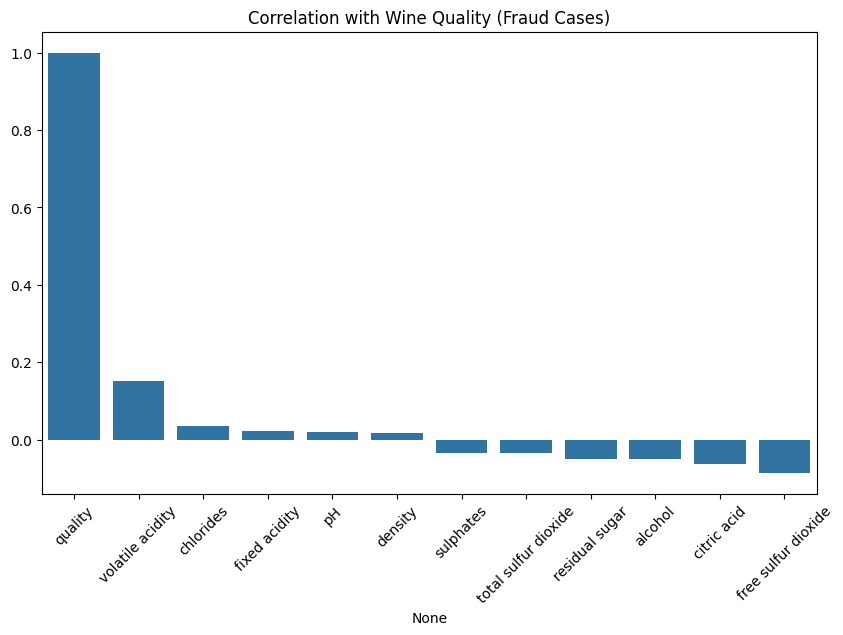

In [62]:
# 5. Korelacja między cechami chemicznymi a jakością wina
# Zamiana etykiet jakości wina na liczby
df['quality'] = df['quality'].map({'Legit': 0, 'Fraud': 1})

# Wybór tylko kolumn liczbowych
numeric_columns = df.select_dtypes(include=[np.number])

# Korelacja między cechami chemicznymi a jakością wina
correlation_matrix = numeric_columns.corr()
fraud_correlation = correlation_matrix['quality'].sort_values(ascending=False)

# Wykres słupkowy wartości korelacji
plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_correlation.index, y=fraud_correlation.values)
plt.title('Correlation with Wine Quality (Fraud Cases)')
plt.xticks(rotation=45)
plt.show()

In [51]:
# 6. Zamiana kolumny kategorialnej dotyczącej rodzaju wina na zmienną fikcyjną.
df = pd.get_dummies(data, columns=['type'], drop_first=True)

In [52]:
# 7. Podział danych na cechy (wartości numeryczne) oraz etykiety.
X = df.drop('quality', axis=1)
y = df['quality']

In [53]:
# 8. Podział zbioru danych na treningowy i testowy.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [54]:
# 9. Standaryzacja zbioru treningowego i testowego.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
# Sprawdzenie brakujących danych w etykietach
print("Brakujące dane w y_train:", y_train.isnull().sum())
print("Brakujące dane w y_test:", y_test.isnull().sum())

Brakujące dane w y_train: 0
Brakujące dane w y_test: 0


In [56]:
# 10. Zastosowanie klasyfikatora maszyny wektorów nośnych z ustawieniami domyślnymi.
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

SVC()

In [57]:
# 11. Wyświetl raport z klasyfikacji oraz macierz błędów dla modelu.
predictions = svm_classifier.predict(X_test)
print("Classification Report (Default Settings):\n", classification_report(y_test, predictions))
print("Confusion Matrix (Default Settings):\n", confusion_matrix(y_test, predictions))

Classification Report (Default Settings):
               precision    recall  f1-score   support

       Fraud       0.00      0.00      0.00        27
       Legit       0.96      1.00      0.98       623

    accuracy                           0.96       650
   macro avg       0.48      0.50      0.49       650
weighted avg       0.92      0.96      0.94       650

Confusion Matrix (Default Settings):
 [[  0  27]
 [  0 623]]


c:\ProgramData\anaconda3\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
# 12. Zastosować metodę przesukiwania siatki w celu doboru optymalnych parametrów C oraz gamma.
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}
grid_search = GridSearchCV(SVC(), param_grid, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   1.3s
[CV] END .....................................C=0.1, gamma=1; total time=   1.4s
[CV] END .....................................C=0.1, gamma=1; total time=   1.3s
[CV] END .....................................C=0.1, gamma=1; total time=   1.1s
[CV] END .....................................C=0.1, gamma=1; total time=   0.8s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.2s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.2s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.2s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.2s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.2s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.1s
[CV] END ..................................C=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

In [59]:
#13. Wyświetl raport z klasyfikacji oraz macierz błędów dla modelu po dostosowaniu parametrów.
best_svm_classifier = grid_search.best_estimator_
best_predictions = best_svm_classifier.predict(X_test)
print("Classification Report (Tuned Settings):\n", classification_report(y_test, best_predictions))
print("Confusion Matrix (Tuned Settings):\n", confusion_matrix(y_test, best_predictions))

Classification Report (Tuned Settings):
               precision    recall  f1-score   support

       Fraud       1.00      0.04      0.07        27
       Legit       0.96      1.00      0.98       623

    accuracy                           0.96       650
   macro avg       0.98      0.52      0.53       650
weighted avg       0.96      0.96      0.94       650

Confusion Matrix (Tuned Settings):
 [[  1  26]
 [  0 623]]
